## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse = pd.merge(mouse_metadata, study_results, how = 'outer', on = "Mouse ID")

# Display the data table for preview
combined_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(combined_mouse["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined_mouse[combined_mouse.duplicated(
  subset = ['Mouse ID', 'Timepoint'],
  keep = False)]

mouse_duplicate = duplicate_data["Mouse ID"].unique()
mouse_duplicate_df = pd.DataFrame(duplicate_data)

#mouse duplicate id =>
duplicate_id = mouse_duplicate_df.iloc[1,0]
duplicate_id


'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_mouse[combined_mouse.duplicated(
  subset = ['Mouse ID', 'Timepoint'],
  keep = False)]

duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. keep = false removes all the duplicated data
mouse_data = combined_mouse.drop_duplicates(
  subset = ['Mouse ID', 'Timepoint'],
  keep = False)

#mouse_data = combined_mouse.drop(combined_mouse.index[combined_mouse['Mouse ID'] == duplicate_id], inplace=True)

mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame. This is wrong, should be 248 and not sure why! Maybe that mouse id is still in there
mice = mouse_data["Mouse ID"].unique()
count_of_mice = len(mice)
count_of_mice




249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regim
#create df groupy by drug
mouse_summary = mouse_data.groupby("Drug Regimen")

#mean,med,var,sf,SEM via the group new df to get average
vol_mean = mouse_summary["Tumor Volume (mm3)"].mean()
vol_mean

vol_med = mouse_summary["Tumor Volume (mm3)"].median()
vol_med

vol_variance = mouse_summary["Tumor Volume (mm3)"].var()
vol_variance

vol_std = mouse_summary["Tumor Volume (mm3)"].std()
vol_std

vol_sem = mouse_summary["Tumor Volume (mm3)"].sem()
vol_sem

summary_table = pd.DataFrame({"Mean": vol_mean,
                                "Median": vol_med,
                                "Variance": vol_variance,
                                "Standard Deviation": vol_std,
                                 "SEM": vol_sem})

summary_table
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

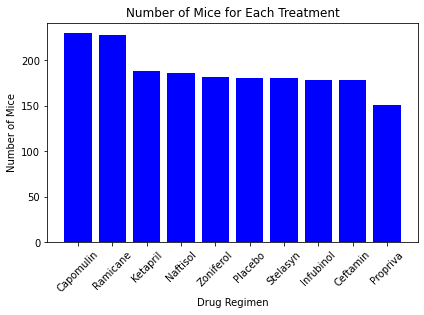

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#pyplot to generate graph data

plot_data = mouse_data['Drug Regimen'].value_counts()
x_axis = plot_data.index.values
y_axis = plot_data.values
#y_axis = (mouse_data.groupby("Drug Regimen")["Mouse ID"].value_counts()).unique()
#x_axis = mouse_data["Drug Regimen"].unique()

plot = plt.bar(x_axis, y_axis, facecolor="blue", alpha = 1, align = "center")

#formatting
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ramicane'),
  Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Placebo'),
  Text(4, 0, 'Ceftamin'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Propriva'),
  Text(9, 0, 'Naftisol')])

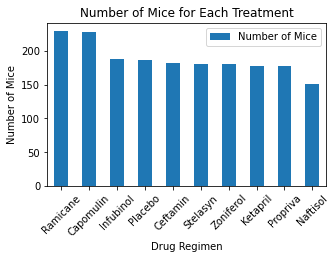

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#set x and y axis'


#create dataframe with x and y axis
bar_df = pd.DataFrame({"Drug Regimen": x_axis,
                        "Number of Mice": y_axis})

#convert dataframe to bar plot using pandas
bar_df = bar_df.set_index(mouse_data["Drug Regimen"].unique())
bar_df.plot(kind="bar", figsize=(5,3),align ="center")
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation = 45)



<AxesSubplot:title={'center':'Female vs Male Distribution'}, ylabel='Sex'>

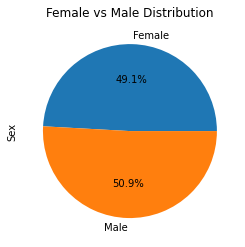

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas ...

#gender_df = pd.DataFrame(mouse_data.groupby("Sex")["Sex"].count())

gender_values = mouse_data.groupby("Sex")["Sex"].count()
labels = mouse_data.groupby("Sex")["Sex"].unique()
gender_df = pd.DataFrame({"Sex":gender_values,
                         "label" : labels})
gender_df.plot(kind='pie',title = "Female vs Male Distribution", y="Sex", legend=False, autopct='%1.1f%%')



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#create males and female values and also label values
#mouse_data_unique = mouse_data("Mouse ID").unique()

gender_values = mouse_data.groupby("Sex")["Sex"].count()
labels = mouse_data.groupby("Sex")["Sex"].unique()

#create pie plot using pandas
plt.pie(gender_values, labels = labels,autopct="%1.1f%%", shadow=True, startangle=90 )
plt.title("Female vs Male Distribution Using MatPlotLib")


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
final_tumor_df = mouse_data.loc[(mouse_data["Drug Regimen"] == "Capomulin") | (mouse_data["Drug Regimen"] == "Ramicane") | (mouse_data["Drug Regimen"] == "Infubinol") | (mouse_data["Drug Regimen"] == "Ceftamin")]


# Start by getting the last (greatest) timepoint for each mouse
tumour_df = final_tumor_df.groupby(["Mouse ID"])
max_tp = tumour_df["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouseid_timepoint = pd.merge(max_tp, mouse_data, on=("Mouse ID", "Timepoint"))
mouseid_timepoint.head()

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
drug_groups = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumour_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_groups:
       
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    target_list = mouseid_timepoint.loc[mouseid_timepoint["Drug Regimen"] == drug]
    tumour = target_list["Tumor Volume (mm3)"]
    tumour_vol.append(tumour) 

    # Determine outliers using upper and lower bounds
    quartiles = tumour.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The {drug} lower quartile: {lowerq}")
    print(f"The {drug} upper quartile: {upperq}")
    print(f"{drug} IQR: {iqr}")
    print(f"{drug} Median: {quartiles[0.5]} ") 
    print(f"{drug} Values below {lower_bound} could be outliers.")
    print(f"{drug} Values above {upper_bound} could be outliers.")

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumour Volume for Drugs')
ax1.set_ylabel('Tumour Volume')
ax1.boxplot(tumour_vol, labels = drug_groups)


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_data = mouse_data.loc[mouse_data["Drug Regimen"] == "Capomulin"]
#capo_data

#get the first mouse id value which can be now used
mouse_cap_id = capo_data.iloc[1,0]
#mouse_cap_id

plot_data = mouse_data.loc[mouse_data["Mouse ID"] == mouse_cap_id]
plot_data

x_axis = plot_data["Timepoint"]
y_axis = plot_data["Tumor Volume (mm3)"]

plt.plot(x_axis,y_axis, marker = "o", color = "blue",
         alpha=0.75)
plt.xlabel("Timepoints")
plt.ylabel("Tumour Volume (mm3)")
plt.title(f"Mouse {mouse_cap_id} Tumour Volume Over Time")

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_id_group = capo_data.groupby(["Mouse ID"])
tumour_vol_ave = mouse_id_group["Tumor Volume (mm3)"].mean()
mouse_weight = mouse_id_group["Weight (g)"].mean()


plt.scatter(mouse_weight, tumour_vol_ave, marker="o", facecolors="blue", edgecolors="black",
            alpha=1)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.title(f"Weight vs Ave. Tumor Vol for Capomulin")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#correlation coefficeint
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(mouse_weight,tumour_vol_ave)[0],2)}") 

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumour_vol_ave)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model for mouse wieght and overage tumour voluem is {line_eq}")